# 🔹 UFC Model Experiments

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 1. Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 200) 

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src

sys.path.append(os.path.join(project_root, 'src'))
from metrics import *
from model_factory import model_factory
from model import UFCModel
from data import UFCData
from config import *
from io_model import load_data, load_model
from helpers import *

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 2. Load Data

In [2]:
# Load the CSV into a DataFrame
try:
    ufc_data = load_data()
    ufc_data
except Exception as e:
    print_header(f"Error loading training data: {e}", color='bright_red')

/home/mlioi/ufc-predictor/data/processed/ufc_data.pkl
📦 UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl


In [3]:
ufc_data

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 3. Load Models

In [3]:
model_list = [UFCModel(model=load_model(name, verbose=True)) for name in pretty_model_name]

📦 Model Logistic Regression loaded from: /home/mlioi/ufc-predictor/models/lr_best.pkl
📦 Model Random Forest loaded from: /home/mlioi/ufc-predictor/models/rf_best.pkl
📦 Model Support Vector Machine loaded from: /home/mlioi/ufc-predictor/models/svm_best.pkl
📦 Model K-Nearest Neighbors loaded from: /home/mlioi/ufc-predictor/models/knn_best.pkl
📦 Model AdaBoost loaded from: /home/mlioi/ufc-predictor/models/ab_best.pkl
📦 Model Naive Bayes loaded from: /home/mlioi/ufc-predictor/models/nb_best.pkl
📦 Model Extra Trees loaded from: /home/mlioi/ufc-predictor/models/et_best.pkl
📦 Model Gradient Boosting loaded from: /home/mlioi/ufc-predictor/models/gb_best.pkl
📦 Model Quadratic Discriminant Analysis loaded from: /home/mlioi/ufc-predictor/models/qda_best.pkl
📦 Model Neural Network loaded from: /home/mlioi/ufc-predictor/models/nn_best.pkl
📦 Model XGBoost loaded from: /home/mlioi/ufc-predictor/models/xgb_best.pkl


<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 4. Evaluate Models

In [7]:
for model in model_list:
    model.metrics = evaluate_metrics(model, ufc_data)
    model.cm = evaluate_cm(model, ufc_data)

## 5. Check Models

### Metrics Comparison

In [8]:
model_metrics = compare_metrics(model_list)

INFO:metrics:Starting comparison of models...
INFO:metrics:Evaluating: Logistic Regression
INFO:metrics:Evaluating: Random Forest
INFO:metrics:Evaluating: Support Vector Machine
INFO:metrics:Evaluating: K-Nearest Neighbors
INFO:metrics:Evaluating: AdaBoost
INFO:metrics:Evaluating: Naive Bayes
INFO:metrics:Evaluating: Extra Trees
INFO:metrics:Evaluating: Gradient Boosting
INFO:metrics:Evaluating: Quadratic Discriminant Analysis
INFO:metrics:Evaluating: Neural Network
INFO:metrics:Evaluating: XGBoost


╔════════════════════════╗
║  Comparison Completed  ║
╚════════════════════════╝


In [9]:
display(model_metrics)

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Brier Score
Model,,,,,,
Logistic Regression,0.6280,0.6113,0.3145,0.4154,0.6668,0.2231
Random Forest,0.6173,0.6324,0.2127,0.3184,0.6374,0.2309
Support Vector Machine,0.6112,0.5990,0.2255,0.3276,0.6247,0.2317
K-Nearest Neighbors,0.5676,0.4750,0.2764,0.3494,0.5475,0.2570
AdaBoost,0.6073,0.5559,0.3255,0.4106,0.6327,0.2344
Naive Bayes,0.5974,0.5240,0.4564,0.4879,0.5835,0.2772
Extra Trees,0.5936,0.5391,0.2255,0.3179,0.5996,0.2357
Gradient Boosting,0.6180,0.6168,0.2400,0.3455,0.6328,0.2308
Quadratic Discriminant Analysis,0.5898,0.5147,0.4127,0.4581,0.6067,0.2454


### Best Model per Metric

In [10]:
best_models_df = best_model_per_metric(model_metrics)
display(best_models_df)

INFO:metrics:Best model for Accuracy: Logistic Regression (0.6280)
INFO:metrics:Best model for Precision: Random Forest (0.6324)
INFO:metrics:Best model for Recall: Naive Bayes (0.4564)
INFO:metrics:Best model for F1 Score: Naive Bayes (0.4879)
INFO:metrics:Best model for ROC AUC: Logistic Regression (0.6668)
INFO:metrics:Best model for Brier Score: Naive Bayes (0.2772)


,Metric,Best Model,Value
0,Accuracy,Logistic Regression,0.6280
1,Precision,Random Forest,0.6324
2,Recall,Naive Bayes,0.4564
3,F1 Score,Naive Bayes,0.4879
4,ROC AUC,Logistic Regression,0.6668
5,Brier Score,Naive Bayes,0.2772


### Feature Importance

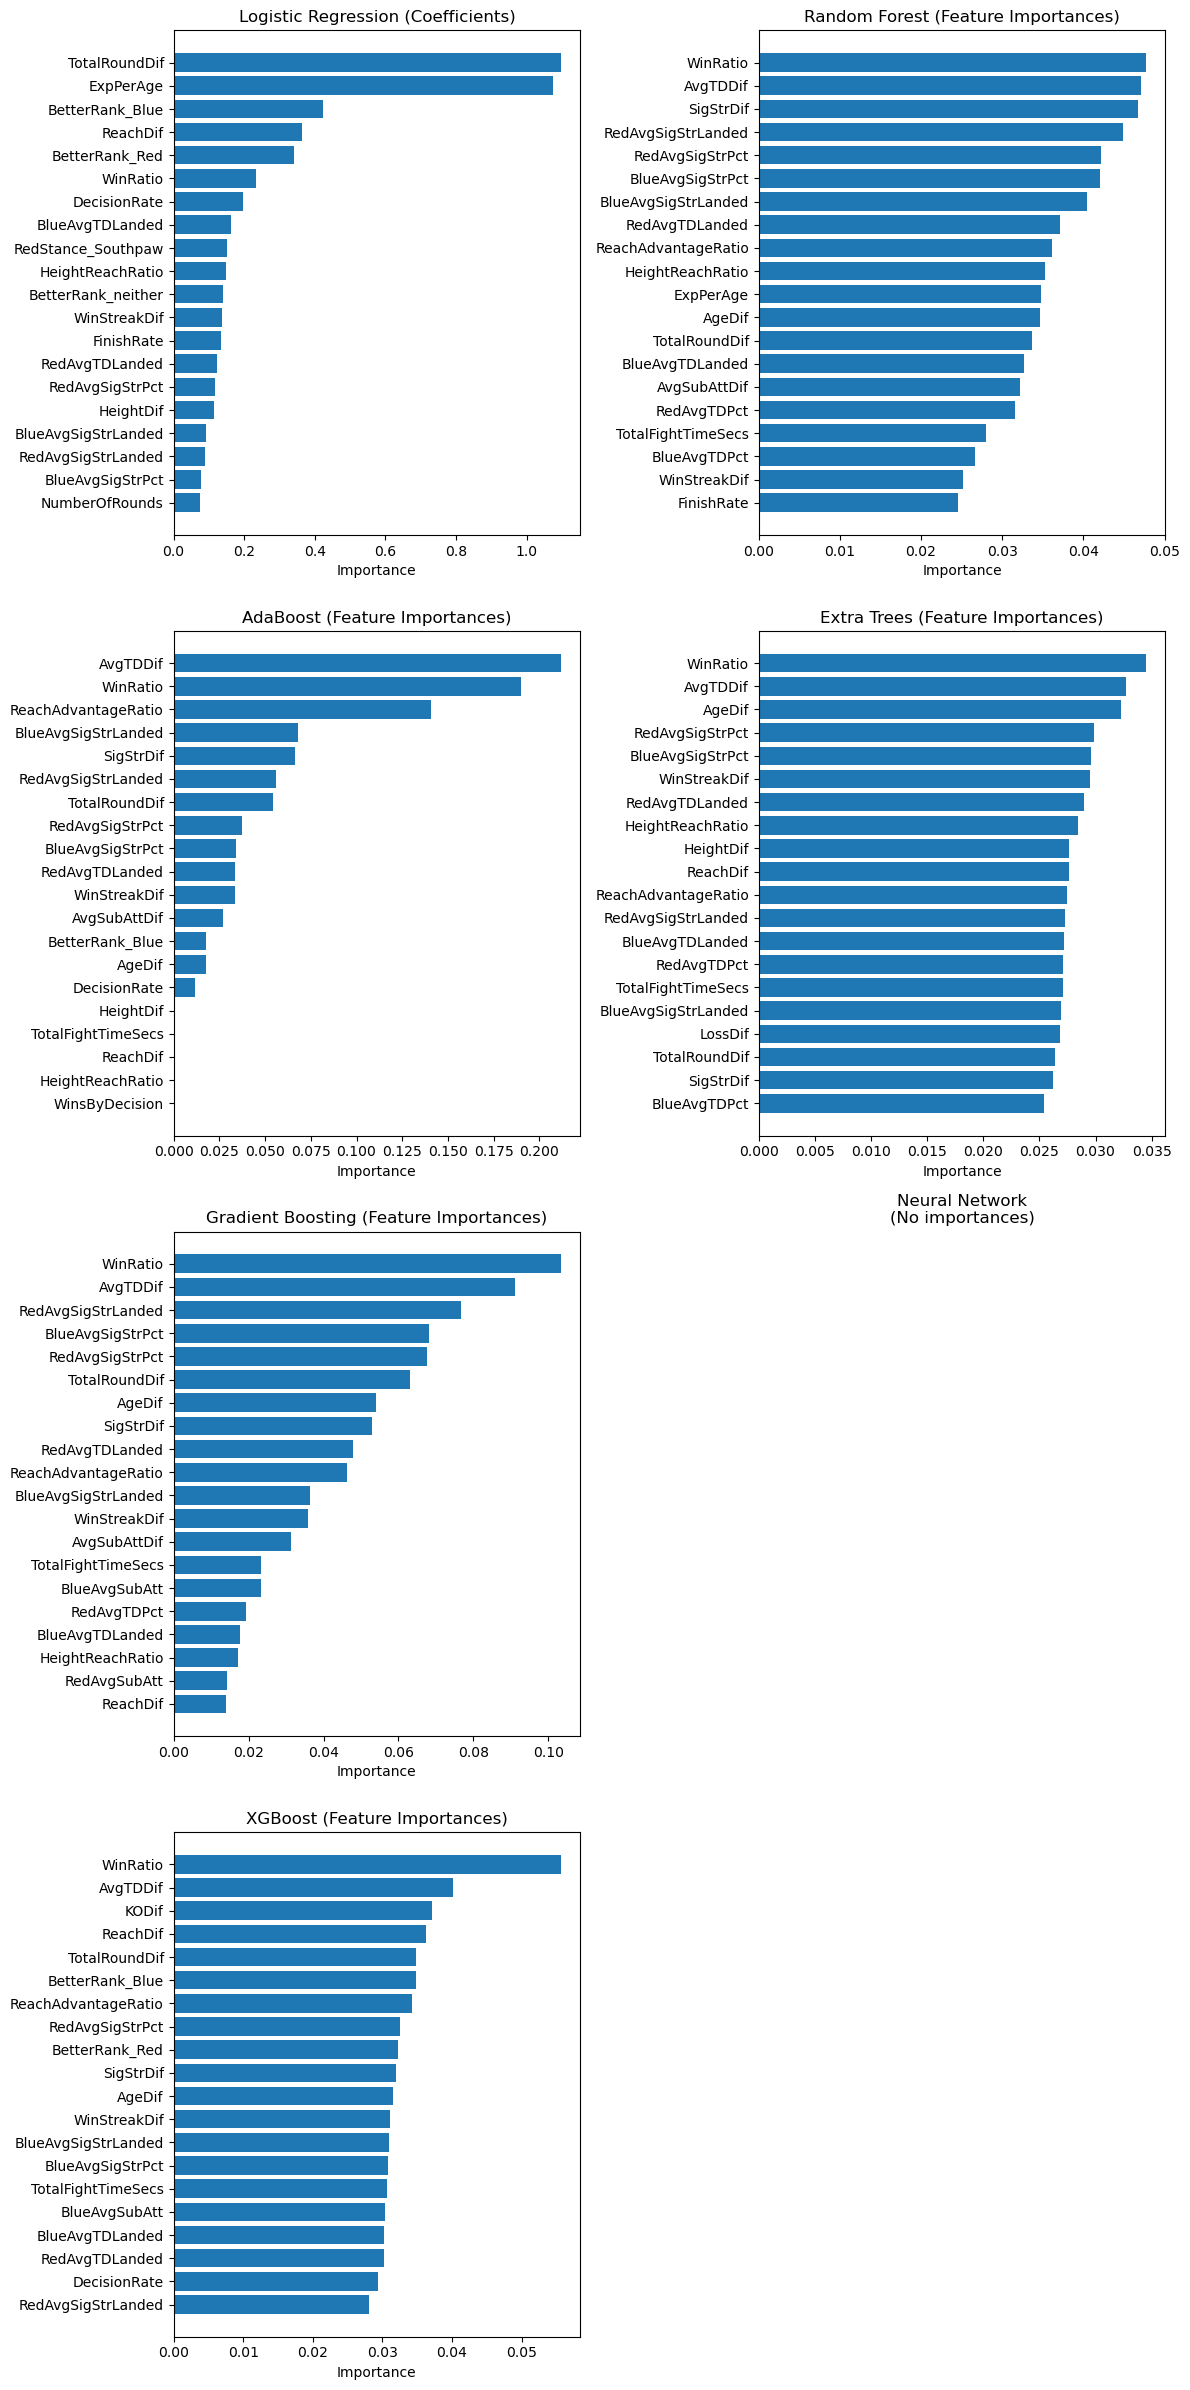

In [12]:
filtered_models = [
    m for m in model_list
    if m.name not in ['Support Vector Machine', 'K-Nearest Neighbors', 'Naive Bayes', 'Quadratic Discriminant Analysis']
]

n_models = len(filtered_models)
n_cols = 2 
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for i, model in enumerate(filtered_models):
    ax = axes[i]
    mdl = model.model
    if hasattr(mdl, "best_estimator_"):
        mdl = mdl.best_estimator_
    if hasattr(mdl, "feature_importances_"):
        importances = mdl.feature_importances_
        title = f"{model.name} (Feature Importances)"
    elif hasattr(mdl, "coef_"):
        importances = np.abs(mdl.coef_.ravel())
        title = f"{model.name} (Coefficients)"
    else:
        ax.axis('off')
        ax.set_title(f"{model.name}\n(No importances)")
        continue

    feature_names = ufc_data._X_train_processed.columns
    max_display = 20
    sorted_idx = np.argsort(importances)[::-1][:max_display]
    top_features = [feature_names[i] for i in sorted_idx]
    top_importances = importances[sorted_idx]
    ax.barh(top_features[::-1], top_importances[::-1])
    ax.set_title(title)
    ax.set_xlabel("Importance")

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

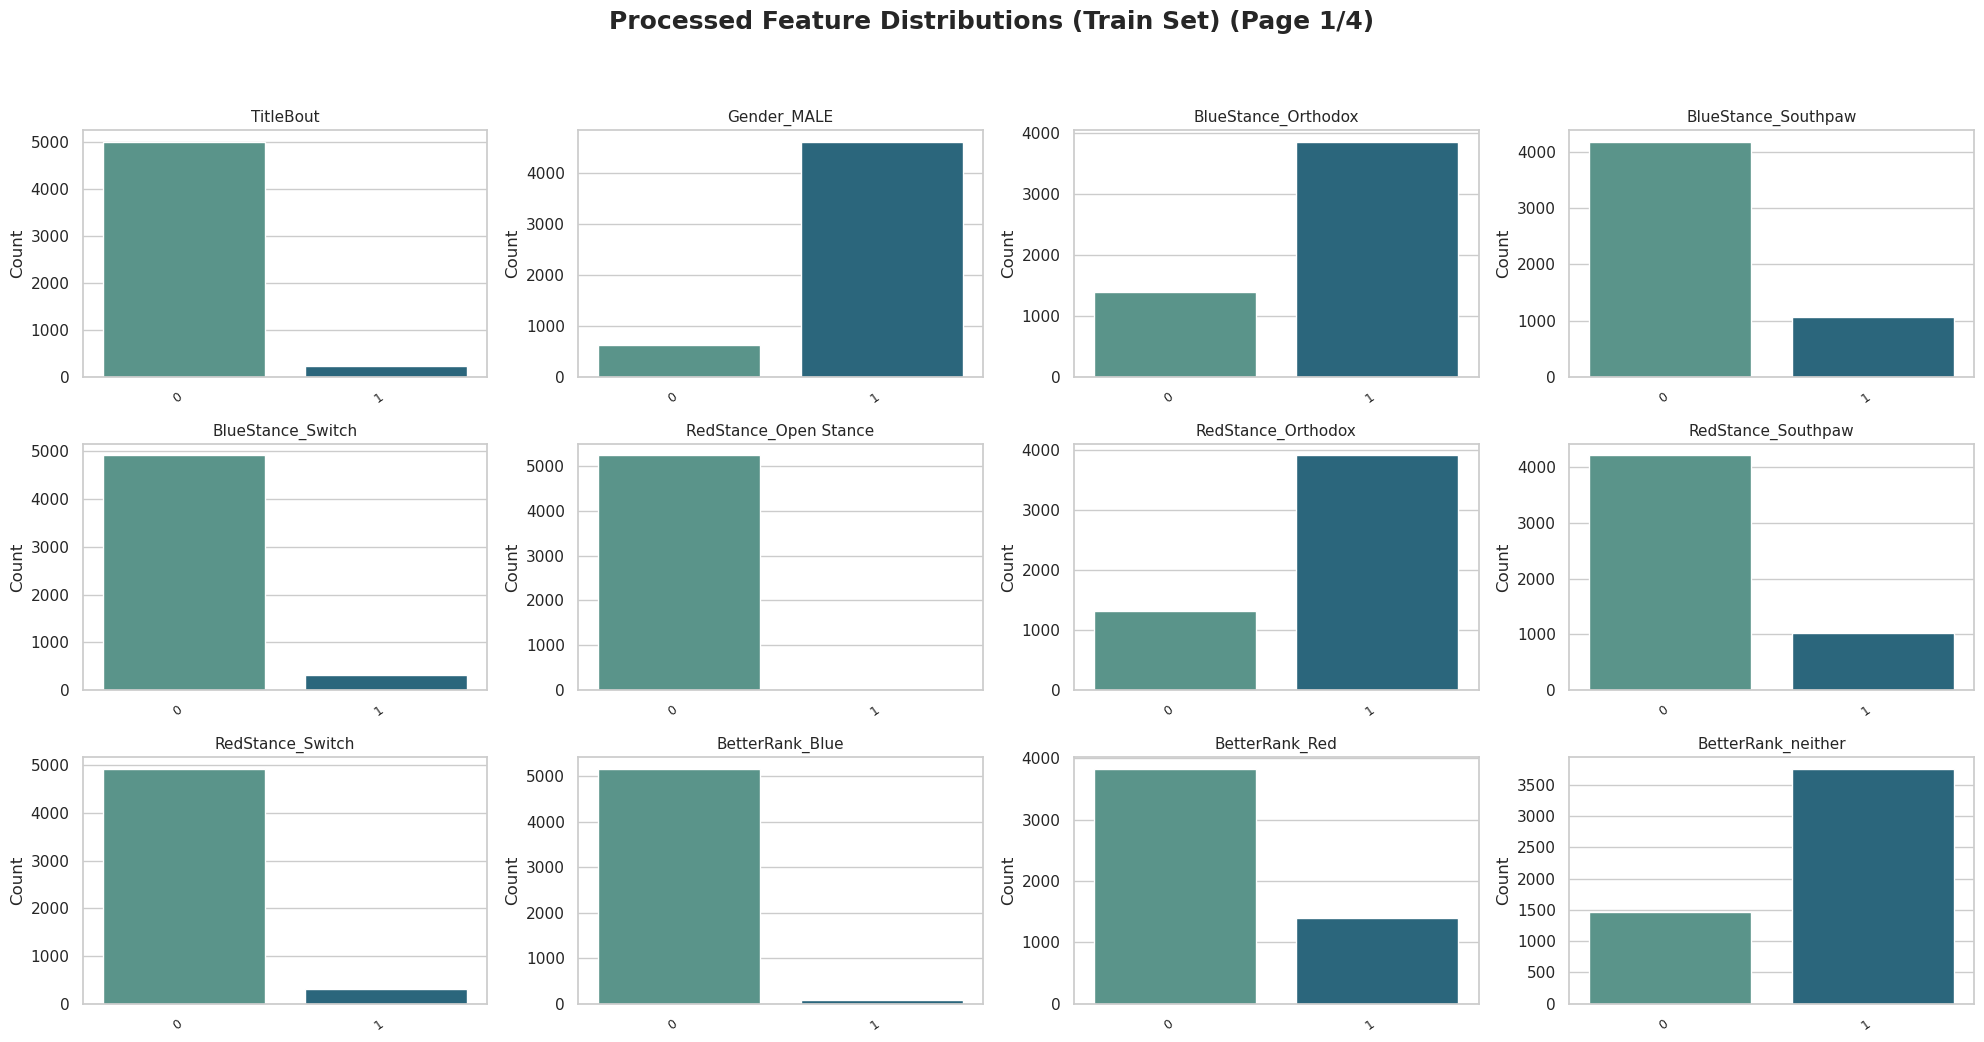

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


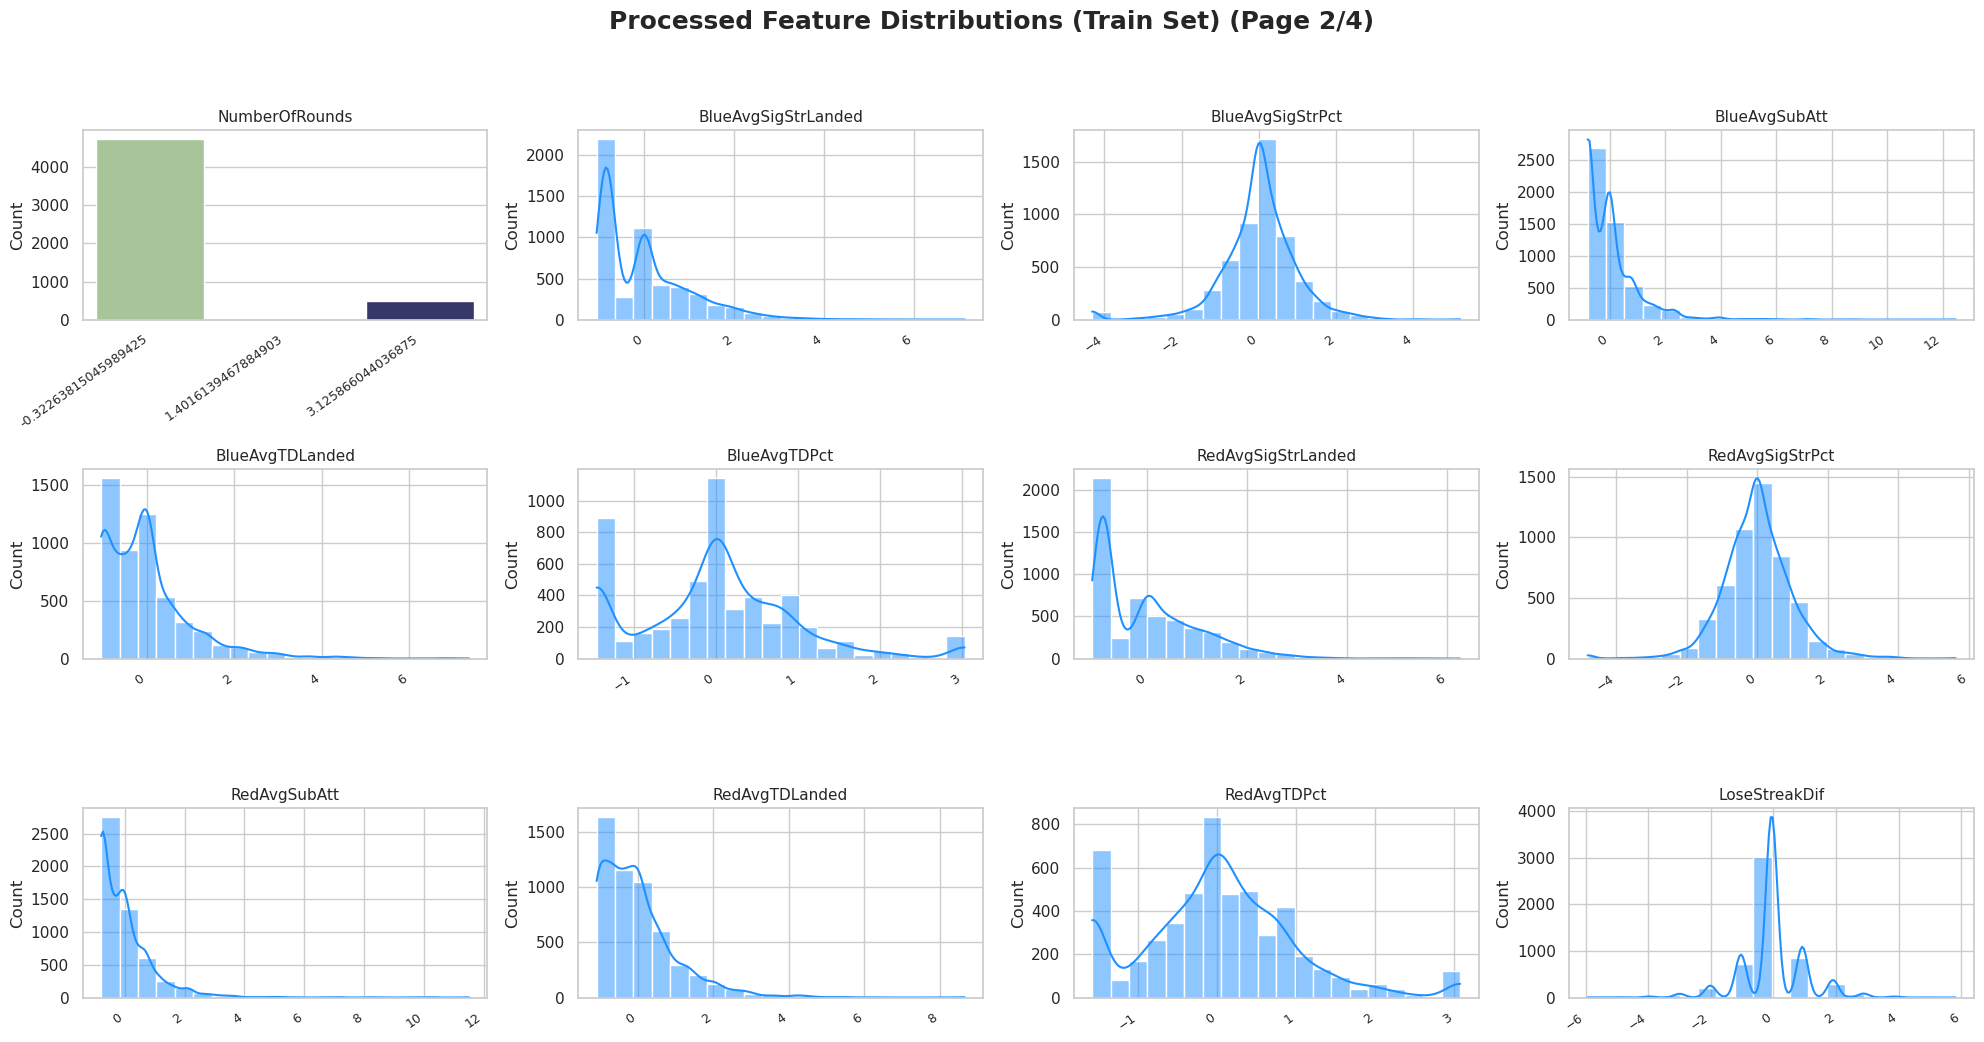

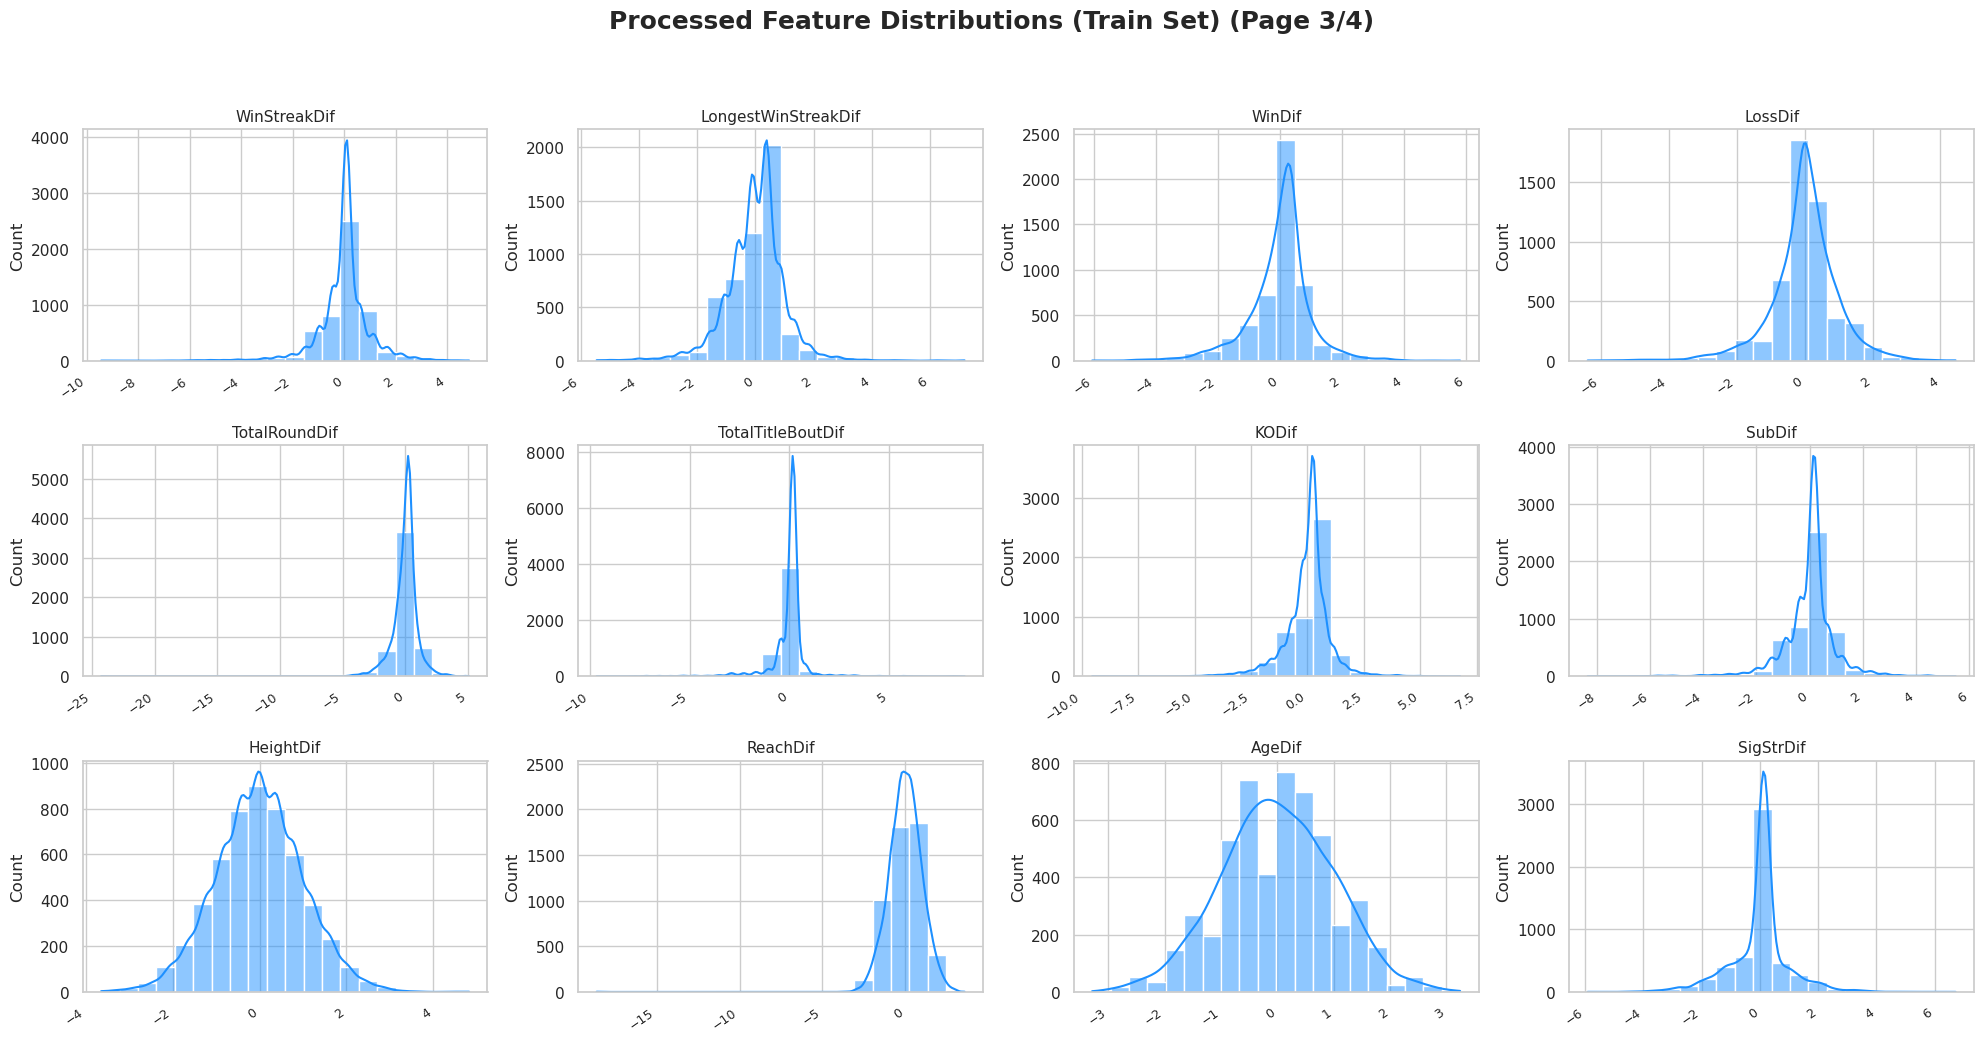

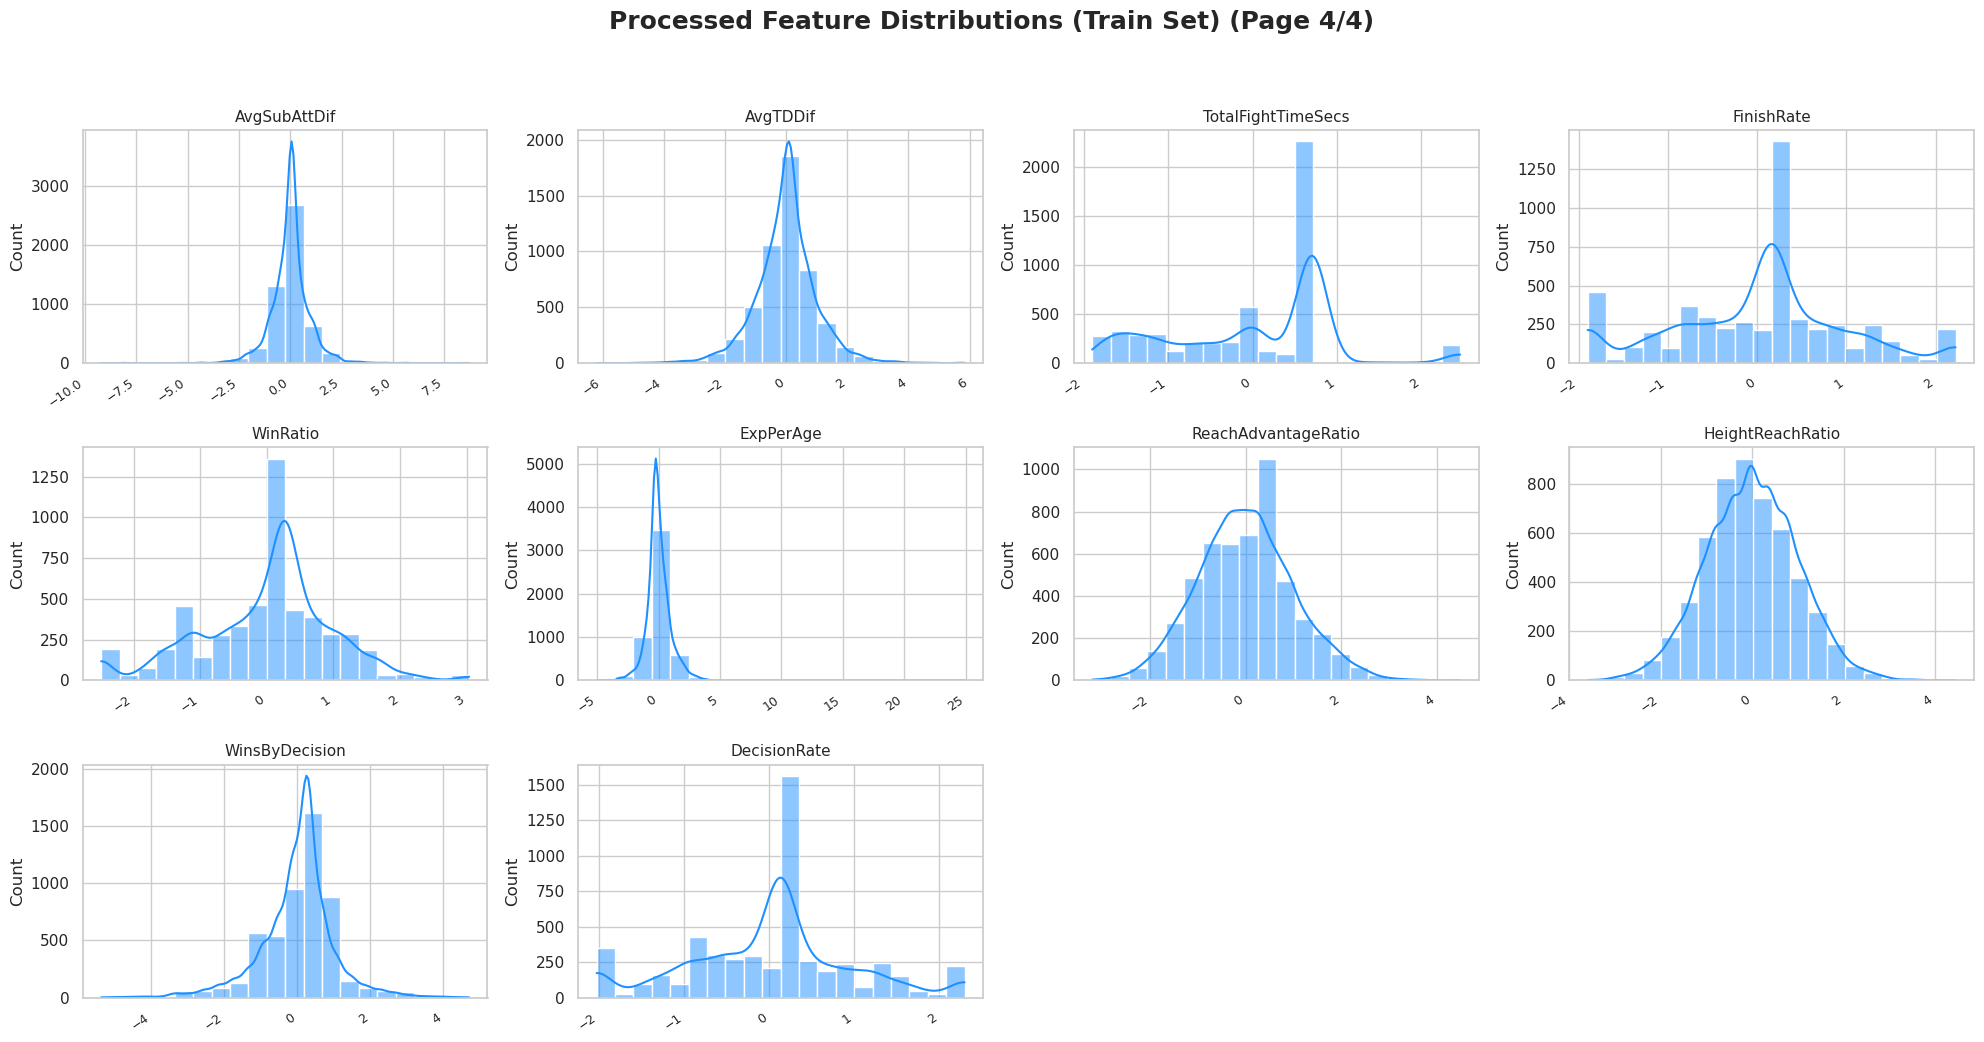

In [15]:
ufc_data.plot_feature_distributions(processed=True)